In [1]:
import numpy as np
from matplotlib import pyplot as pl

# Regressão Linear por Gradiente Descendente

Regressão linear envolve encontrar os parâmetros para fitar uma reta através do método dos mínimos quadrados. O algorítimo é parecido com o do perceptron, exceto que agora ele tenta minimizar uma certa função custo (neste caso será o quadrado da diferença entre o valor real e o calculado pela rede $(y - \vec w\cdot \vec x_{n})$.

Input: $\vec{x_{i}}=(x_{1},x_{2},...,x_{d})$


Fazendo: $x_{i}=(1,\vec{x_{i}})$  ,  
        $w=(w_{0},w_{1},...,w_{d})$.
        
Chutamos os pesos: $\vec{w_{0}}$

A função de custo será: $\Sigma_{n}  (y_{n}-\vec w\cdot \vec x_{n})^2$

Então atualizamos os pesos usando a derivada da função de custo: $dw_{j}=\Sigma_{n}  (y_{n}-\vec w\cdot \vec x_{n}) x_{j}$


In [2]:
class grad:
    
    def __init__(self,x,y):
        # Define as dimensões do input
        if len(x.shape) == 1:
            self.dim = 1
        else:
            self.dim = x.shape[1]
        self.n = len(y)
        
        # vetor input estendido
        X = np.zeros((self.n,self.dim+1))
        for i in range (self.n):
            X[i] = np.concatenate((1,x[i]),axis=None)
        self.X = X.T
        self.Y = y
        self.W = np.random.rand(self.dim+1)
        
    
    # função custo
    def cost(self,w):
        X = self.X
        N = self.n
        A = np.dot(w.T,X)
        J = np.sum((self.Y-A)**2)/N
        return J
    
    
    # algoritimo descida gradiente
    # (h=taxa de aprend. v=nº iterações)
    def desce(self,h,v):
        X = self.X
        Y = self.Y
        N = self.n
        w = np.random.rand(self.dim+1)
        # vetor pra guardar info de como o custo evolui com o tempo
        c = np.zeros(v+1)
        
        for i in range (v):
            c[i] = self.cost(w)
            
            dw = np.zeros(len(w))
            Z = np.dot(w.T,X)
            A = Y-Z
            
            dw += np.dot(X,A.T)
            
            w += h*dw
            C = self.cost(w)
            
            # checa se a função custo está diminuindo
            if c[i] > C:
                c[i+1] = C
                
            # senão, refaz o passo usando uma taxa de aprend. menor
            # (isso já é um passo extra que eu coloquei pra não deixar
            # o gradiente explodir)
            if C > c[i]:
                w = w - h*dw
                h = 3*h/4
                v = v - 1
                #print(h)            
            
        self.W = w
        
        # retorna os pesos atualizados e o historico da função custo
        return w, c

    
    # Prevê o valor de 1 imput
    def prever(self,x):
        X = np.concatenate((1,x),axis=None)
        w = self.W
        return np.dot(w.T,X)
    
    
    # usa uma álgebra maluca pra calcular
    # a raiz da variância do ajuste
    def var(self):
        N = self.n
        w = self.W
        return np.sqrt(np.sum((self.Y-np.dot(w.T,self.X))**2)/(N-self.dim))
    
    
    # Calcula R²
    # porcentagem que vai dizer o quanto a variância de uma variável
    # pode ser explicada por uma relação linear com outra (nesse caso x)
    def Rsq(self):
        N = self.n
        # variância da média de y
        var_m = np.sum((self.Y-np.mean(self.Y))**2)/N
        # variância do ajuste 
        var_f = self.var()
        
        # var média > var fit -> R² < 1
        return (var_m - var_f)/var_m
    
    
    # calcula F
    # um valor que indica o quão significante R² é
    def F(self):
        N = self.n        
        # nº graus de liberdade (parâmetros) do ajuste
        p_f = self.dim+1
        # nª graus liberdade da média (dimensões do output)
        p_m = 1
        # variância da média de y
        var_m = np.sum((self.Y-np.mean(self.Y))**2)/N
        # variância do ajuste 
        var_f = self.var()
        
        # var média > var fit -> F > 1
        return (var_m - var_f)/var_f*(N-p_f)/(p_f-p_m)  
    
    
    # álgebra maluca pra calcular a
    # raiz da variância dos parâmetros
    def varp(self):        
        X = self.X
        X = X.T
        if np.linalg.det(np.dot(X.T,X))==0:
            print('det=0')
            return 0
        
        D = np.linalg.inv(np.dot(X.T,X))*self.var()**2
        p = np.zeros(self.dim+1)
        for i in range (len(p)):
            p[i] = np.sqrt(D[i][i])
        return p     
    
    
    # printar parâmetros e incertezas
    def par(self):
        vp = self.varp()
        for i in range (len(vp)):
            print('w',i,'=',self.W[i],'+',vp[i],)

# Teste linear

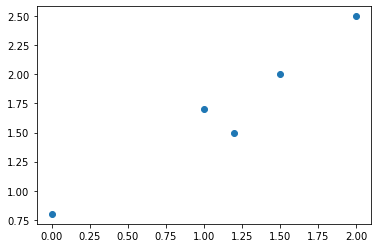

In [3]:
# input
x = np.array([0,1,1.2,1.5,2])
# output
y = np.array([0.8,1.7,1.5,2,2.5])

pl.scatter(x,y)

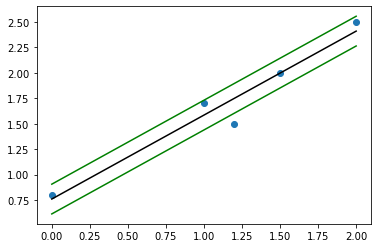

In [4]:
# taxa de aprendizado e nº maximo de iterações
h, v = 0.1, 40

yes = grad(x,y)
# pesos e histórico da função de custo
W, c = yes.desce(h,v)[0], yes.desce(h,v)[1]

X = yes.X
#prevê
z = np.dot(W.T,X)
#print(z)

# calcular e plotar as incertezas
var = yes.var()
z1, z2 = z + var, z-var

pl.plot(x,z,c='black')
pl.plot(x,z1,c='g')
pl.plot(x,z2,c='g')

pl.scatter(x,y)

In [5]:
# dado o ponto x = a
a = 1

# prever y(a) e sua incerteza
print(yes.prever(a),'+',yes.var())

1.5815779404045913 + 0.14626050075887753


In [6]:
# devolve os parâmetros dessa reta
yes.par()

# R² e F
print('\nR² =',yes.Rsq(),'\nF =',yes.F())

w 0 = 0.748323651421296 + 0.13023618535487277
w 1 = 0.8332542889832952 + 0.09878858869573584

R² = 0.537150314054185 
F = 3.4815859037899513


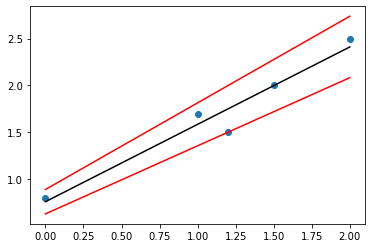

In [7]:
# calcula a incerteza dos parâmetros
vp = yes.varp()
z = np.dot(W.T,X)

w1, w2 = W + vp, W - vp

# calcula e plota a reta com os parâmetros mais extremos
z_max = np.dot(w1.T, X)
z_min = np.dot(w2.T, X)

pl.plot(x,z,c='black')
pl.plot(x,z_max,c='r')
pl.plot(x,z_min,c='r')

pl.scatter(x,y)

# Mais dimensões

Se temos mais dimensões fica difícil de visualizar o problema, mas o algorítimo ainda funciona.

In [8]:
#input 2D
x = np.array([(0,1),(2,2),(3,4)])
#output 1D
y = np.array([1,4,7])

no = grad(x,y)

In [9]:
h, v = 0.1, 500

desce = no.desce(h,v)

w = desce[0]
print(w)

[0.00123383 1.00119833 0.99865964]


w 0 = 0.0012338343137053395 + 0.001503721504074353
w 1 = 1.001198326139465 + 0.0013646050293770395
w 2 = 0.9986596424920227 + 0.0013646050293770397


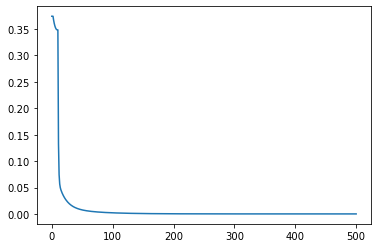

In [10]:
c = desce[1]

# ver como a função custo diminui ao longo das iterações
pl.plot(c)

# printa os parâmetros e suas incertezas
no.par()